# Testing A-F plots

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## Testing `single_run_1GnB()` - time evolution

In [26]:
n = 2

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,5)
purif_policies = [main.policy_identity, main.policy_replacement, main.policy_DEJMPS]
policy_names = ['Identity', 'Replacement', 'DEJMPS']
pur_after_swap = False

# NOISE
Gamma = 1/50 #1/5

# CONS
p_cons = 0.3

# Numerical
t_end = int(1e4)
randomseed = 2

In [27]:
## SIMULATION ##

imp.reload(main)

Fcons_avg_vec = [[] for policy in purif_policies]
Fcons_stderr_vec = [[] for policy in purif_policies]
A_avg_vec = [[] for policy in purif_policies]
A_stderr_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in tqdmn(q_purif_vec):
        F_avg,F_err,A_avg,A_err,_, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
        Fcons_avg_vec[idx_policy] += [F_avg]
        Fcons_stderr_vec[idx_policy] += [F_err]
        A_avg_vec[idx_policy] += [A_avg]
        A_stderr_vec[idx_policy] += [A_err]
        
sim_data = {'Fcons_avg_vec': Fcons_avg_vec,
            'Fcons_stderr_vec': Fcons_stderr_vec,
            'A_avg_vec': A_avg_vec,
            'A_stderr_vec': A_stderr_vec}

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [28]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [[] for policy in purif_policies]
A_theory_vec = [[] for policy in purif_policies]

print('WARNING: we are not calculating the theory values rn, using simulation as placeholder!')

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in q_purif_vec:
        Fcons_theory_vec[idx_policy] = Fcons_avg_vec[idx_policy]
        A_theory_vec[idx_policy] = A_avg_vec[idx_policy]

theory_data = {'Fcons_avg': Fcons_theory_vec,
                'A': A_theory_vec}

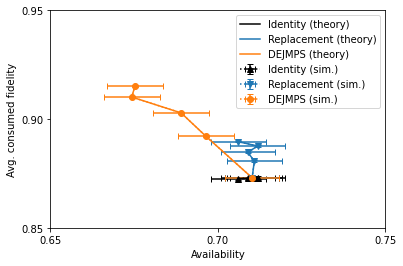

In [29]:
## PLOT ##

imp.reload(main)

main.AFplot(policy_names, sim_data=sim_data, theory_data=theory_data, filename=None)

---
### CONCLUSIONS:
 1. From visual inspection, seems to be working. Not tested quantitatively.
---

---
---
## Testing `single_run_1GnB()` - time evolution

In [56]:
n = 3

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,10)
purif_policies = [main.policy_DEJMPS, main.policy_doubleDEJMPS, main.policy_nestedDEJMPS]
policy_names = ['DEJMPS', 'Double DEJMPS', 'Nested DEJMPS']
pur_after_swap = False

# NOISE
Gamma = 1/50 #1/5

# CONS
p_cons = 0.3

# Numerical
t_end = int(1e5)
randomseed = 2

In [57]:
## SIMULATION ##

imp.reload(main)

Fcons_avg_vec = [[] for policy in purif_policies]
Fcons_stderr_vec = [[] for policy in purif_policies]
A_avg_vec = [[] for policy in purif_policies]
A_stderr_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in tqdmn(q_purif_vec):
        F_avg,F_err,A_avg,A_err,_, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
        Fcons_avg_vec[idx_policy] += [F_avg]
        Fcons_stderr_vec[idx_policy] += [F_err]
        A_avg_vec[idx_policy] += [A_avg]
        A_stderr_vec[idx_policy] += [A_err]
        
sim_data = {'Fcons_avg_vec': Fcons_avg_vec,
            'Fcons_stderr_vec': Fcons_stderr_vec,
            'A_avg_vec': A_avg_vec,
            'A_stderr_vec': A_stderr_vec}

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [58]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [[] for policy in purif_policies]
A_theory_vec = [[] for policy in purif_policies]

print('WARNING: we are not calculating the theory values rn, using simulation as placeholder!')

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in q_purif_vec:
        Fcons_theory_vec[idx_policy] = Fcons_avg_vec[idx_policy]
        A_theory_vec[idx_policy] = A_avg_vec[idx_policy]

theory_data = {'Fcons_avg': Fcons_theory_vec,
                'A': A_theory_vec}

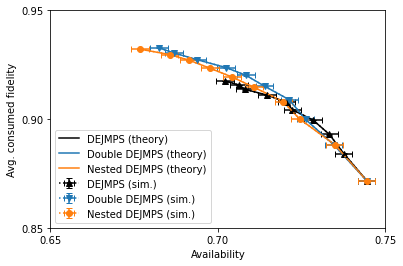

In [59]:
## PLOT ##

imp.reload(main)

main.AFplot(policy_names, sim_data=sim_data, theory_data=theory_data, filename=None)

---
### CONCLUSIONS:
 1. Exciting stuff! Sometimes (n=5 in the Figure) Nested DEJMPS is better than DEJMPS, as one would expect. However, Double DEJMPS (applying DEJMPS at most twice and discarding any extra new links) is even better than Nested DEJMPS. I observed this behavior for n>2 (for n=1 and n=2, Double and Nested are the same).
This suggests that, if we want to apply a simple protocol in a nested way, we should only use a subset of the newly generated links.
---